In [3]:
%matplotlib inline

In [4]:
import pandas as pd

# Create list of columns

In [5]:
# clean up column names


    
def fix_col_name(col_split):
        new_string = col_split[1].replace('(','')
        new_string = new_string.replace(')','')
        new_string = new_string.replace(',','-')
        new_string = new_string.replace('BodyBody','Body')
        new_string = new_string.replace('Body','')
        new_string = new_string.replace('Mag','')
        new_string = new_string.replace('mean','Mean')
        new_string = new_string.replace('std','STD')
        return(new_string)
  
col_list =[]
x = 0
with open('features.txt','r+') as feature_file:
    for line in feature_file: # one line is one column
#         print(line)
        col_split = line.split() # splits the numbers and characters from the column into seperate fields to work with
#         print(col_split)
        new_col = fix_col_name(col_split)
#         print(new_col)
        col_list.append(new_col + col_split[0])
#     col_list = remove_dups(col_list)
#         break # stop at one record
        
        
# Identify and fix the inclusion of ( ) in column names.
# Identify and remove duplicate column names.
# Identify and fix the inclusion of ‘-’ in column names.
# Identify and fix extra ) in some column names.
# Identify and fix inclusion of multiple ‘,’ in column names.
# Identify and fix column names containing “BodyBody”
# Drop 'Body' and 'Mag' from column names.
# Map 'mean' and 'std' to 'Mean' and 'STD'
# Make 'activity' a categorical variable.
# Plot a histogram of Body Acceleration Magnitude (i.e. histogram of all 6 activities) to see how each variable does as a predictor of static versus dynamic activities.        



In [6]:
# print(len(col_list))
# print(col_list)

# # Import the data into pandas

In [8]:

Location = r'C:\Users\bob071988\thinkful\ds-new\UCI\test\X_test.txt'

df = pd.read_table(Location, header = None, delim_whitespace=True, names = col_list)

In [9]:
input_shape = df.shape

In [10]:
# df.head()

In [11]:
len(col_list)

561

In [28]:

drop_list = ['angle','band']
for col in df.columns.values:
    for item in drop_list:
        test = col.find(item) # returns -1 if item not found
        #print("col is {} and item is {} and test is {}".format(col,item, test))
#         print("test val = {}".format(test))
        if test == -1:
            pass
            #print("keeping these = find value {} --- finding {} column value {}".format(test,item, col))
            
        else:
            #print("droping these = find value {} --- finding {} column value {}".format(test,item, col))
            df.drop(col, axis = 1, inplace = True)
#             new_cols.remove(col) # useful to keep track of new list of columns in new df - could just use df.column.values though
            break # if its in the drop list drop and stop looking

In [29]:
new_shape = df.shape
print(new_shape[0])
print(input_shape[0])
print(new_shape[1])
print(input_shape[1])

2947
2947
429
561


In [30]:
print("removed {} rows and {} columns since input".format(input_shape[0]-new_shape[0],input_shape[1]-new_shape[1]))

removed 0 rows and 132 columns since input


In [15]:
df.head()


,tAcc-Mean-X1,tAcc-Mean-Y2,tAcc-Mean-Z3,tAcc-STD-X4,tAcc-STD-Y5,tAcc-STD-Z6,tAcc-mad-X7,tAcc-mad-Y8,tAcc-mad-Z9,tAcc-max-X10,...,fGyroJerk-max545,fGyroJerk-min546,fGyroJerk-sma547,fGyroJerk-energy548,fGyroJerk-iqr549,fGyroJerk-entropy550,fGyroJerk-maxInds551,fGyroJerk-MeanFreq552,fGyroJerk-skewness553,fGyroJerk-kurtosis554
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.988566,-0.992021,-0.985562,-0.999850,-0.984015,-0.849081,-0.936508,0.116695,-0.344418,-0.736124
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.992653,-0.992505,-0.990498,-0.999925,-0.986376,-0.895847,-0.936508,-0.121711,-0.534685,-0.846595


In [20]:
with open(r'C:\Users\bob071988\thinkful\ds-new\UCI\test\y_test.txt','r+') as cat_file:
    cat_list = []
    for line in cat_file: # one line is one column
        line = line.strip()
        if '1' in line:
            activity = 'WALKING'
        elif '2' in line:
            activity  = 'WALKING_UPSTAIRS'
        elif '3' in line:
            activity  = 'WALKING_DOWNSTAIRS'
        elif '4' in line:
            activity  = 'SITTING'
        elif '5' in line:
            activity  = 'STANDING'
        elif '6' in line:
            activity  = 'LAYING' 
        else:
            print("error here")
            
        cat_list.append(activity)
    #print(cat_list)
    
df['activity'] = cat_list # actual activity

In [52]:
with open(r'C:\Users\bob071988\thinkful\ds-new\UCI\new_labels.txt','r+') as new_label_file:
    label_list = []
    for line in new_label_file: # one line is one column
        line = line.strip()
        label_list.append(line)
        #print(cat_list)
    
# df['label'] = label_list # computed from just the 5 values
labels = pd.Series(label_list, index = ['1','2','3','4','5','6'])
    

In [49]:
# get unique list of activities
with open(r'C:\Users\bob071988\thinkful\ds-new\UCI\test\y_test.txt','r+') as cat_file:
    num_list = []
    for line in cat_file: # one line is one column
        line = line.strip()
        num_list.append(line)
        #print(cat_list)
    
df['act_num'] = num_list # numerical representation of activity

In [21]:
df.head()


,tAcc-Mean-X1,tAcc-Mean-Y2,tAcc-Mean-Z3,tAcc-STD-X4,tAcc-STD-Y5,tAcc-STD-Z6,tAcc-mad-X7,tAcc-mad-Y8,tAcc-mad-Z9,tAcc-max-X10,...,fGyroJerk-min546,fGyroJerk-sma547,fGyroJerk-energy548,fGyroJerk-iqr549,fGyroJerk-entropy550,fGyroJerk-maxInds551,fGyroJerk-MeanFreq552,fGyroJerk-skewness553,fGyroJerk-kurtosis554,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.992021,-0.985562,-0.999850,-0.984015,-0.849081,-0.936508,0.116695,-0.344418,-0.736124,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.992505,-0.990498,-0.999925,-0.986376,-0.895847,-0.936508,-0.121711,-0.534685,-0.846595,STANDING


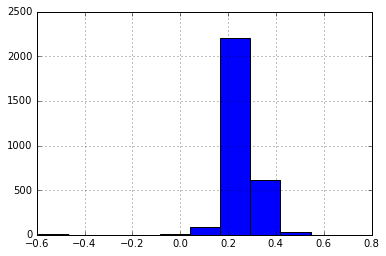

In [22]:
df['tAcc-Mean-X1'].hist()
# tBodyAcc-mean()

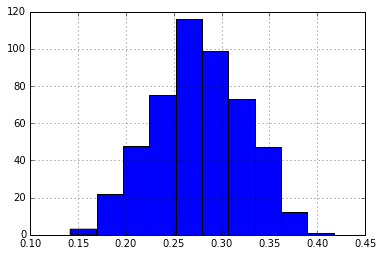

In [23]:
filter = df['activity'] == 'WALKING'
newdf = df[filter]
newdf['tAcc-Mean-X1'].hist()

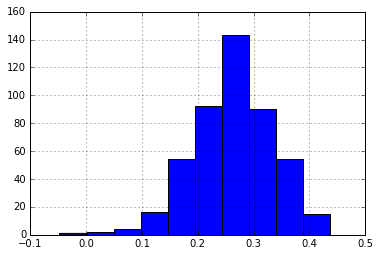

In [24]:
Rfilter = df['activity'] == 'WALKING_UPSTAIRS'
Rnewdf = df[Rfilter]
Rnewdf['tAcc-Mean-X1'].hist()

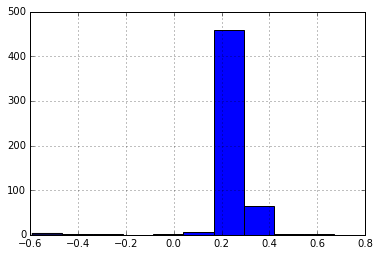

In [25]:
Lfilter = df['activity'] == 'LAYING'
Lnewdf = df[Lfilter]
Lnewdf['tAcc-Mean-X1'].hist()

In [26]:
import os
os.getcwd()

'C:\\Users\\bob071988\\thinkful\\ds-new\\UCI'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# import numpy as np

# iris = load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
# df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# df.head()

# train, test = df[df['is_train']==True], df[df['is_train']==False]

# features = df.columns[:4]
# clf = RandomForestClassifier(n_jobs=2)
# y, _ = pd.factorize(train['species'])
# clf.fit(train[features], y)

# preds = iris.target_names[clf.predict(test[features])]
# pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

In [32]:
# from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# import numpy as np

In [63]:
# df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
# df['species'] = pd.Factor(iris.target, iris.target_names)
# df['act2'] = pd.Categorical.from_codes(df.act_num, labels)

train, test = df[df['is_train']==True], df[df['is_train']==False]
features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['activity'])
clf.fit(train[features], y)

# preds = iris.target_names[clf.predict(test[features])
preds = labels[clf.predict(test[features])]

pd.crosstab(test['activity'], preds, rownames=['actual'], colnames=['preds'])

ValueError: cannot reindex from a duplicate axis

In [66]:
print("len preds {} len activity {}".format(len(preds),len(test)) )

len preds 737 len activity 737


In [64]:
preds

3    WALKING_DOWNSTAIRS
1               WALKING
3    WALKING_DOWNSTAIRS
1               WALKING
1               WALKING
2      WALKING_UPSTAIRS
1               WALKING
2      WALKING_UPSTAIRS
2      WALKING_UPSTAIRS
1               WALKING
2      WALKING_UPSTAIRS
1               WALKING
2      WALKING_UPSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
4               SITTING
6                LAYING
4               SITTING
4               SITTING
6                LAYING
4               SITTING
4               SITTING
4               SITTING
4               SITTING
4               SITTING
            ...        
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
3    WALKING_DOWNSTAIRS
4               SITTING
4               SITTING
6               

In [61]:
test.head()

,tAcc-Mean-X1,tAcc-Mean-Y2,tAcc-Mean-Z3,tAcc-STD-X4,tAcc-STD-Y5,tAcc-STD-Z6,tAcc-mad-X7,tAcc-mad-Y8,tAcc-mad-Z9,tAcc-max-X10,...,fGyroJerk-energy548,fGyroJerk-iqr549,fGyroJerk-entropy550,fGyroJerk-maxInds551,fGyroJerk-MeanFreq552,fGyroJerk-skewness553,fGyroJerk-kurtosis554,activity,is_train,act_num
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.999925,-0.986376,-0.895847,-0.936508,-0.121711,-0.534685,-0.846595,STANDING,False,5
13,0.269066,-0.027686,-0.110178,-0.996884,-0.986440,-0.988479,-0.997498,-0.987389,-0.989487,-0.941286,...,-0.999976,-0.993354,-1.000000,-0.968254,0.193194,-0.605233,-0.879209,STANDING,False,5
14,0.275579,-0.018936,-0.097410,-0.996065,-0.968225,-0.980696,-0.996218,-0.964627,-0.982347,-0.943252,...,-0.999969,-0.993221,-1.000000,-0.904762,0.224369,-0.720919,-0.930019,STANDING,False,5
21,0.271339,-0.029954,-0.118595,-0.960931,-0.905035,-0.871270,-0.973400,-0.905701,-0.856332,-0.864369,...,-0.992930,-0.916226,-0.277661,-1.000000,-0.048729,-0.078417,-0.515394,STANDING,False,5
24,0.275639,-0.015566,-0.125458,-0.989161,-0.968516,-0.968723,-0.990635,-0.969443,-0.967756,-0.930510,...,-0.999779,-0.981406,-0.776458,-0.968254,0.237547,-0.390130,-0.720884,STANDING,False,5


In [62]:
preds

NameError: name 'preds' is not defined

In [54]:
labels

1               WALKING
2      WALKING_UPSTAIRS
3    WALKING_DOWNSTAIRS
4               SITTING
5              STANDING
6                LAYING
dtype: object

In [46]:
df.act_num

0       5
1       5
2       5
3       5
4       5
5       5
6       5
7       5
8       5
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      5
17      5
18      5
19      5
20      5
21      5
22      5
23      5
24      5
25      5
26      5
27      5
28      5
29      5
       ..
2917    2
2918    2
2919    2
2920    2
2921    2
2922    2
2923    2
2924    2
2925    2
2926    2
2927    2
2928    3
2929    3
2930    3
2931    3
2932    3
2933    3
2934    3
2935    3
2936    3
2937    2
2938    2
2939    2
2940    2
2941    2
2942    2
2943    2
2944    2
2945    2
2946    2
Name: act_num, dtype: object